## Conv1D

- 컨볼루션(CNN) 방법은 이미지 데이터의 특징을 추출하는 데 적합한 방법
- 시퀀스 데이터의 특징을 추출하기 위한 방법도 존재함.
    - 1차원 형태의 컨볼루션 필터를 가지는 1D 컨볼루션 층
    - 케라스에서는 Conv1D로 기능을 제공함.

- 최근 Conv1D와 LSTM을 혼합 사용하면서 좋은 성능을 보여주고 있다.

- 결국 CNN + RNN

## 데이터셋 준비하기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

## 데이터를 동일한 길이로 맞추기

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

## 모델 구성하기 - Conv1D

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있다.
# Flatten 층을 사용하기 위해 input_length를 전달해야 한다.

model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                

## 모델 학습시키기

In [5]:
hist = model.fit(pad_x_train, y_train,
                batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 30s 48ms/step - loss: 0.4574 - acc: 0.7574 - val_loss: 0.3321 - val_acc: 0.8582
Epoch 2/30
625/625 [==============================] - 27s 43ms/step - loss: 0.2281 - acc: 0.9117 - val_loss: 0.3171 - val_acc: 0.8696
Epoch 3/30
625/625 [==============================] - 28s 45ms/step - loss: 0.1202 - acc: 0.9589 - val_loss: 0.3876 - val_acc: 0.8706
Epoch 4/30
625/625 [==============================] - 27s 42ms/step - loss: 0.0477 - acc: 0.9861 - val_loss: 0.4999 - val_acc: 0.8650
Epoch 5/30
625/625 [==============================] - 29s 46ms/step - loss: 0.0141 - acc: 0.9973 - val_loss: 0.6593 - val_acc: 0.8652
Epoch 6/30
625/625 [==============================] - 28s 45ms/step - loss: 0.0042 - acc: 0.9998 - val_loss: 0.7249 - val_acc: 0.8648
Epoch 7/30
625/625 [==============================] - 27s 44ms/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.7759 - val_acc: 0.8650
Epoch 8/30
625/625 [==============================] - 28s 45ms

## 모델 평가하기

In [6]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 1.4855 - acc: 0.8403


[1.4854543209075928, 0.8402799963951111]

## 학습 과정 그리기

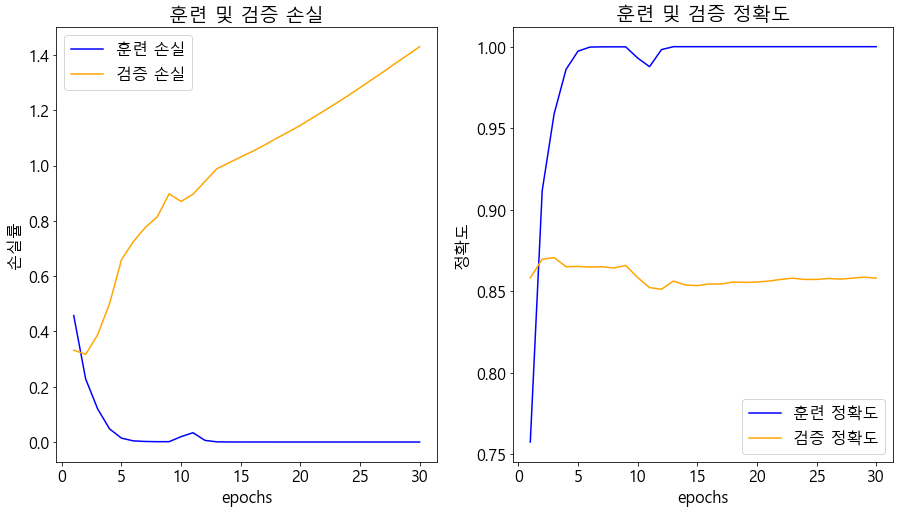

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 8)

his_dict = hist.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure()

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = '훈련 손실')
ax1.plot(epochs, val_loss, color = 'orange', label = '검증 손실')
ax1.set_title('훈련 및 검증 손실')
ax1.set_xlabel('epochs')
ax1.set_ylabel('손실률')
ax1.legend()

# 훈련 및 검증 정확도 그리기
acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = '훈련 정확도')
ax2.plot(epochs, val_acc, color = 'orange', label = '검증 정확도')
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('epochs')
ax2.set_ylabel('정확도')
ax2.legend()

plt.show()